In [25]:
import sys
import scipy
import numpy as np
import matplotlib as plt
import pandas as pd
import sklearn 
import seaborn as sns

In [26]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [27]:
def load_data():
    return pd.read_csv(r'Dane Inzynierka.csv')

dataset = load_data()

Summarize the dataset

In [28]:
# print("Dataset shape: ",dataset.shape)
print("Dataset: ",dataset.columns)
#print("Dataset description: ",dataset.describe)

Dataset:  Index(['numer_sprawy', 'kategoria_gwałt', 'kategoria_kradzież',
       'kategoria_pobicie', 'kategoria_porwanie', 'kategoria_wandalizm',
       'kategoria_włamanie', 'kategoria_zabójstwo', 'wojewodztwo_dolnośląskie',
       'wojewodztwo_kujawskopomorskie', 'wojewodztwo_lubelskie',
       'wojewodztwo_lubuskie', 'wojewodztwo_mazowieckie',
       'wojewodztwo_małopolskie', 'wojewodztwo_opolskie',
       'wojewodztwo_podkarpackie', 'wojewodztwo_podlaskie',
       'wojewodztwo_pomorskie', 'wojewodztwo_warmińsko-mazurskie',
       'wojewodztwo_wielkopolskie', 'wojewodztwo_zachodniopomorskie',
       'wojewodztwo_łódzkie', 'wojewodztwo_śląskie',
       'wojewodztwo_świętokrzyskie', 'wiek_ofiary_20-30', 'wiek_ofiary_30-50',
       'wiek_ofiary_50+', 'wiek_ofiary_brak ofiary', 'wiek_ofiary_do 20',
       'wiek_ofiary_poniżej 20', 'kolor_wlosow_ofiary_brak ofiary',
       'kolor_wlosow_ofiary_brak/łysina', 'kolor_wlosow_ofiary_ciemny blond',
       'kolor_wlosow_ofiary_czarne', 'kolor

Data Vizualization

PCA (Principal Component Analysis) implementation

In [29]:
dataset = dataset.drop(['wiek_ofiary_do 20'], axis=1)

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=59)
pcs = pca.fit_transform(dataset)
pca.explained_variance_ratio_.cumsum()

array([0.99388857, 0.99481469, 0.99552295, 0.99586823, 0.99617493,
       0.99647488, 0.99675298, 0.99701571, 0.99724525, 0.99745852,
       0.99765625, 0.99783145, 0.9979948 , 0.99815128, 0.99829842,
       0.99843514, 0.99856964, 0.99868745, 0.99879765, 0.99889821,
       0.99898687, 0.99907363, 0.99915463, 0.99922887, 0.99929786,
       0.99936283, 0.99942216, 0.99947852, 0.99953066, 0.99958146,
       0.99963121, 0.99967603, 0.99971658, 0.99975257, 0.99978748,
       0.99981663, 0.99984384, 0.99986793, 0.99989128, 0.99991039,
       0.99992735, 0.99994342, 0.99995696, 0.99996888, 0.99997775,
       0.99998516, 0.99999053, 0.99999581, 0.99999815, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

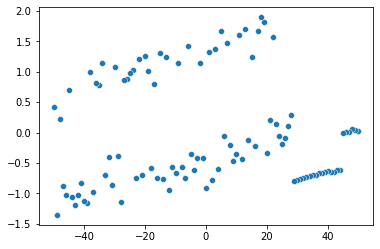

In [9]:
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

Widzimy, że pierwszy wymiar pokrywa nam jedynie 20% wyników, dopiero zastosowanie 25 daje wyniki powyżej 90% pokrytych danych

Wstawka

In [31]:
X = dataset
y = dataset['numer_sprawy']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [35]:
explained_variance = pca.explained_variance_ratio_

In [36]:
print(explained_variance)

[1.26473047e-01 8.52561338e-02 6.32983190e-02 4.85252684e-02
 4.52702817e-02 4.04499427e-02 3.89542284e-02 3.74274508e-02
 3.59546480e-02 3.36907789e-02 3.11933851e-02 3.07235706e-02
 2.67947844e-02 2.58185737e-02 2.37638093e-02 2.26055976e-02
 2.14309492e-02 2.14077009e-02 2.00435587e-02 1.97634314e-02
 1.91567562e-02 1.63491041e-02 1.55588374e-02 1.52192820e-02
 1.43252873e-02 1.32091974e-02 1.18122014e-02 9.82168500e-03
 9.52934654e-03 8.58114714e-03 7.89016941e-03 7.39444108e-03
 6.74824488e-03 6.22063171e-03 5.00370549e-03 4.79630839e-03
 4.48114290e-03 4.26996124e-03 4.12186285e-03 3.51640342e-03
 3.37335883e-03 2.40437566e-03 2.00773136e-03 1.64399494e-03
 1.15403551e-03 1.09002946e-03 7.06549441e-04 5.24230239e-04
 2.44519261e-04 2.49424106e-32 1.36597249e-33 1.09852882e-33
 9.40676392e-34 7.15123267e-34 6.38206429e-34 6.38206429e-34
 6.38206429e-34 6.38206429e-34 6.38206429e-34 6.38206429e-34]


In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

koniec wstawki

Agglomerative Hierarchical Clustering

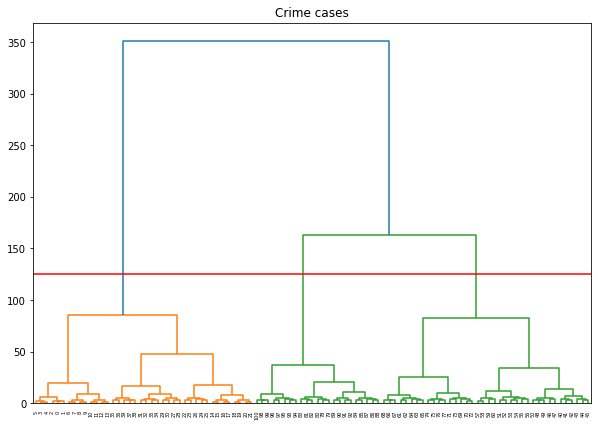

In [40]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Crime cases")

# Selecting Annual Income and Spending Scores by index
selected_data = dataset.iloc[:, 0:59]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.show()


In [41]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
array = clustering_model.labels_
print(array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5
 5 5 5 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 8 8 8 8 8 8 8 8 7 7 7 7 7
 7 7 7 7 9 9 9 9 9 9 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 6]


In [62]:
def loadarray():
    dataset["Numer Klastra"] = "1"
    for i in range(0,len(array)):
        dataset.iloc[i] = array[i]

    print(dataset.head())

loadarray()
dataset.to_csv('Test-Dane.csv')

   numer_sprawy  kategoria_gwałt  kategoria_kradzież  kategoria_pobicie  \
0             0                0                   0                  0   
1             0                0                   0                  0   
2             0                0                   0                  0   
3             0                0                   0                  0   
4             0                0                   0                  0   

   kategoria_porwanie  kategoria_wandalizm  kategoria_włamanie  \
0                   0                    0                   0   
1                   0                    0                   0   
2                   0                    0                   0   
3                   0                    0                   0   
4                   0                    0                   0   

   kategoria_zabójstwo  wojewodztwo_dolnośląskie  \
0                    0                         0   
1                    0                         0